In [1]:
"""
This script reads a CSV file from a Google Drive link using the pandas library
and displays the first few rows of the DataFrame.

Parameters:
    None

Returns:
    pandas.DataFrame: A DataFrame containing the data from the CSV file.
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# URL of the Google Drive file
url = 'https://drive.google.com/uc?id={}'.format('1ObDguC7GLyziziU_ASfsbFbR_gTGw1-V')

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


<ipython-input-2-ed39f9e7eebd>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


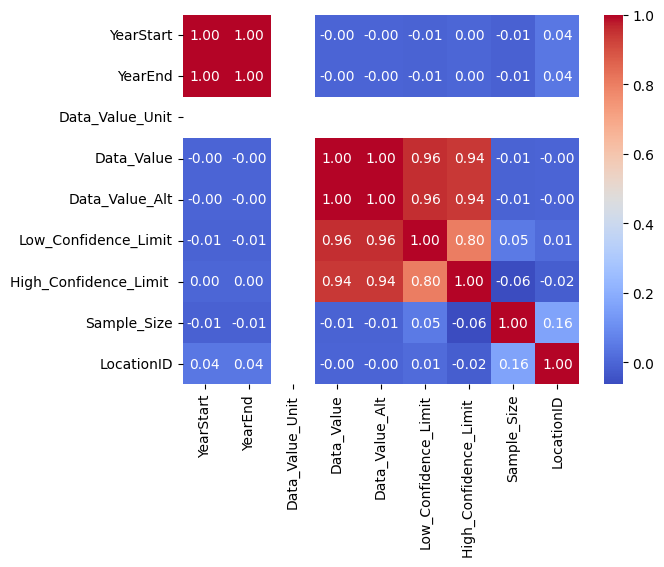

In [2]:
"""
Visualize a correlation matrix using a heatmap.

This script calculates the correlation matrix for a DataFrame and displays it
as a heatmap using the seaborn library. The heatmap helps visualize the
correlation between pairs of numeric columns in the DataFrame.

Parameters:
    None

Returns:
    None
"""

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [3]:
columns_to_drop = ['Data_Value_Unit',
'Data_Value_Type',
'Data_Value_Alt',
'Data_Value_Footnote_Symbol',
'Data_Value_Footnote',
'Topic',
'ClassID',
'TopicID',
'QuestionID',
'DataValueTypeID',
'StratificationID1',
'StratificationCategoryId1',
'YearEnd',
'LocationAbbr',
'GeoLocation',
'LocationID',
'Sample_Size',
'Total',
'StratificationCategory1',
'Stratification1',
'Datasource']

In [4]:
"""
Drop specified columns from a DataFrame in-place.

This script takes a DataFrame ('df') and a list of column names ('columns_to_drop')
and removes the specified columns from the DataFrame in-place. The DataFrame is
modified, and the changes are saved.

Parameters:
    df (pd.DataFrame): The DataFrame from which columns should be dropped.
    columns_to_drop (list): A list of column names to be removed from the DataFrame.

Returns:
    None
"""

df.drop(columns=columns_to_drop,inplace=True)
df.head()

,YearStart,LocationDesc,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age(years),Education,Gender,Income,Race/Ethnicity
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,NaN,NaN,NaN,NaN,NaN
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,NaN,NaN,Male,NaN,NaN
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,NaN,NaN,Female,NaN,NaN
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,NaN,Less than high school,NaN,NaN,NaN
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,NaN,High school graduate,NaN,NaN,NaN


In [5]:
df.shape

(53392, 12)

In [6]:
filter_columns = df.columns.to_list()
filter_columns

['YearStart',
 'LocationDesc',
 'Class',
 'Question',
 'Data_Value',
 'Low_Confidence_Limit',
 'High_Confidence_Limit ',
 'Age(years)',
 'Education',
 'Gender',
 'Income',
 'Race/Ethnicity']

In [7]:
def replace_missing_categorical(df, column_name, replacement_value=None):
    """
    Replace missing values in a categorical column with a specified or most frequent category.

    This function replaces missing values (e.g., 'Data not reported') in a specified categorical column ('column_name')
    with either a user-specified replacement category or the most frequent category in the column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the categorical column to be processed.
        column_name (str): The name of the categorical column with missing values to be replaced.
        replacement_value (str or None): The value to replace missing values with. If None, the most frequent
            category in the column will be used as the replacement.

    Returns:
        pd.DataFrame: The DataFrame with missing values replaced in the specified column.

    Example:
        # Replace missing values in 'Income' column with the mode ('Most Frequent Category')
        df = replace_missing_categorical(df, 'Income')
    """
    # Count the number of missing values in the specified column
    missing_count = (df[column_name] == 'Data not reported').sum()

    if replacement_value is None:
        # Replace with the most frequent category in the column
        most_frequent_category = df[df[column_name] != 'Data not reported'][column_name].mode()[0]
        df[column_name] = df[column_name].replace('Data not reported', most_frequent_category)
    else:
        # Replace with the specified value
        df[column_name] = df[column_name].replace('Data not reported', replacement_value)

    return df

df = replace_missing_categorical(df, 'Income')
df

,YearStart,LocationDesc,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age(years),Education,Gender,Income,Race/Ethnicity
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,NaN,NaN,NaN,NaN,NaN
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,NaN,NaN,Male,NaN,NaN
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,NaN,NaN,Female,NaN,NaN
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,NaN,Less than high school,NaN,NaN,NaN
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,NaN,High school graduate,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian
53388,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander
53389,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native
53390,2016,Virgin Islands,Physical Activity,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races


In [8]:
"""
Generate descriptive statistics of a DataFrame.

This method calculates and returns summary statistics of a given DataFrame, including count, mean, standard deviation,
minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each numeric column.

Parameters:
    None

Returns:
    pd.DataFrame: A DataFrame containing summary statistics for each numeric column in the DataFrame.

Example:
    # Generate summary statistics for a DataFrame called 'df'
    summary_stats = df.describe()
"""

df.describe()

,YearStart,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
count,53392.000000,48346.000000,48346.000000,48346.000000
mean,2013.281465,31.156681,26.892227,35.989997
std,1.693300,10.247033,10.038584,11.205813
min,2011.000000,0.900000,0.300000,3.000000
25%,2012.000000,24.100000,20.000000,28.200000
50%,2013.000000,30.700000,26.450000,35.600000
75%,2015.000000,37.000000,32.900000,42.200000
max,2016.000000,77.600000,69.500000,87.700000


In [9]:
df_physical_class = pd.get_dummies(df, columns=['Class'], prefix='Class')

In [10]:
df_physical_class = pd.get_dummies(df_physical_class, columns=['Age(years)', 'Education','Gender','Income','Race/Ethnicity'])

In [11]:
df_physical_class.head()

,YearStart,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,Age(years)_18 - 24,...,"Income_$75,000 or greater","Income_Less than $15,000",Race/Ethnicity_2 or more races,Race/Ethnicity_American Indian/Alaska Native,Race/Ethnicity_Asian,Race/Ethnicity_Hawaiian/Pacific Islander,Race/Ethnicity_Hispanic,Race/Ethnicity_Non-Hispanic Black,Race/Ethnicity_Non-Hispanic White,Race/Ethnicity_Other
0,2011,Alabama,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,Alabama,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,Alabama,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,Alabama,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,Alabama,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_physical_class.isnull().sum()

YearStart                                          0
LocationDesc                                       0
Question                                           0
Data_Value                                      5046
Low_Confidence_Limit                            5046
High_Confidence_Limit                           5046
Class_Fruits and Vegetables                        0
Class_Obesity / Weight Status                      0
Class_Physical Activity                            0
Age(years)_18 - 24                                 0
Age(years)_25 - 34                                 0
Age(years)_35 - 44                                 0
Age(years)_45 - 54                                 0
Age(years)_55 - 64                                 0
Age(years)_65 or older                             0
Education_College graduate                         0
Education_High school graduate                     0
Education_Less than high school                    0
Education_Some college or technical school    

In [13]:
# Calculate the mean values for each of the three columns
mean_data_value = df_physical_class['Data_Value'].mean()
mean_low_confidence_limit = df_physical_class['Low_Confidence_Limit'].mean()
mean_high_confidence_limit  = df_physical_class['High_Confidence_Limit '].mean()
# Fill missing values with the mean values
df_physical_class['Data_Value'].fillna(mean_data_value, inplace=True)
df_physical_class['Low_Confidence_Limit'].fillna(mean_low_confidence_limit, inplace=True)
df_physical_class['High_Confidence_Limit '].fillna(mean_high_confidence_limit,inplace=True)

In [14]:
df_physical_class.isnull().sum()

YearStart                                       0
LocationDesc                                    0
Question                                        0
Data_Value                                      0
Low_Confidence_Limit                            0
High_Confidence_Limit                           0
Class_Fruits and Vegetables                     0
Class_Obesity / Weight Status                   0
Class_Physical Activity                         0
Age(years)_18 - 24                              0
Age(years)_25 - 34                              0
Age(years)_35 - 44                              0
Age(years)_45 - 54                              0
Age(years)_55 - 64                              0
Age(years)_65 or older                          0
Education_College graduate                      0
Education_High school graduate                  0
Education_Less than high school                 0
Education_Some college or technical school      0
Gender_Female                                   0


In [15]:
# Calculate the IQR for the 'Data_Value' column
Q1 = df_physical_class['Data_Value'].quantile(0.25)
Q3 = df_physical_class['Data_Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Data_Value' column
df_cleaned = df_physical_class[(df_physical_class['Data_Value'] >= lower_bound) & (df_physical_class['Data_Value'] <= upper_bound)]

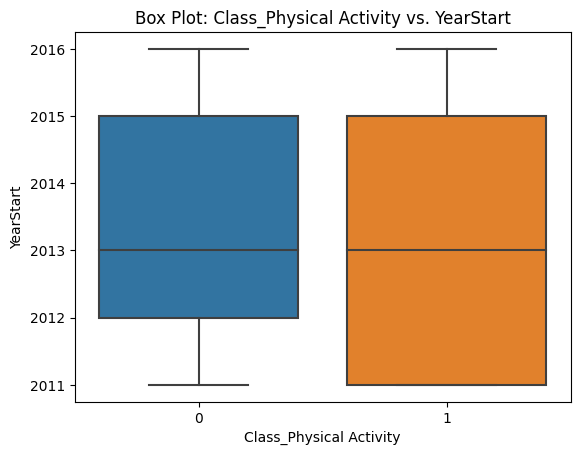

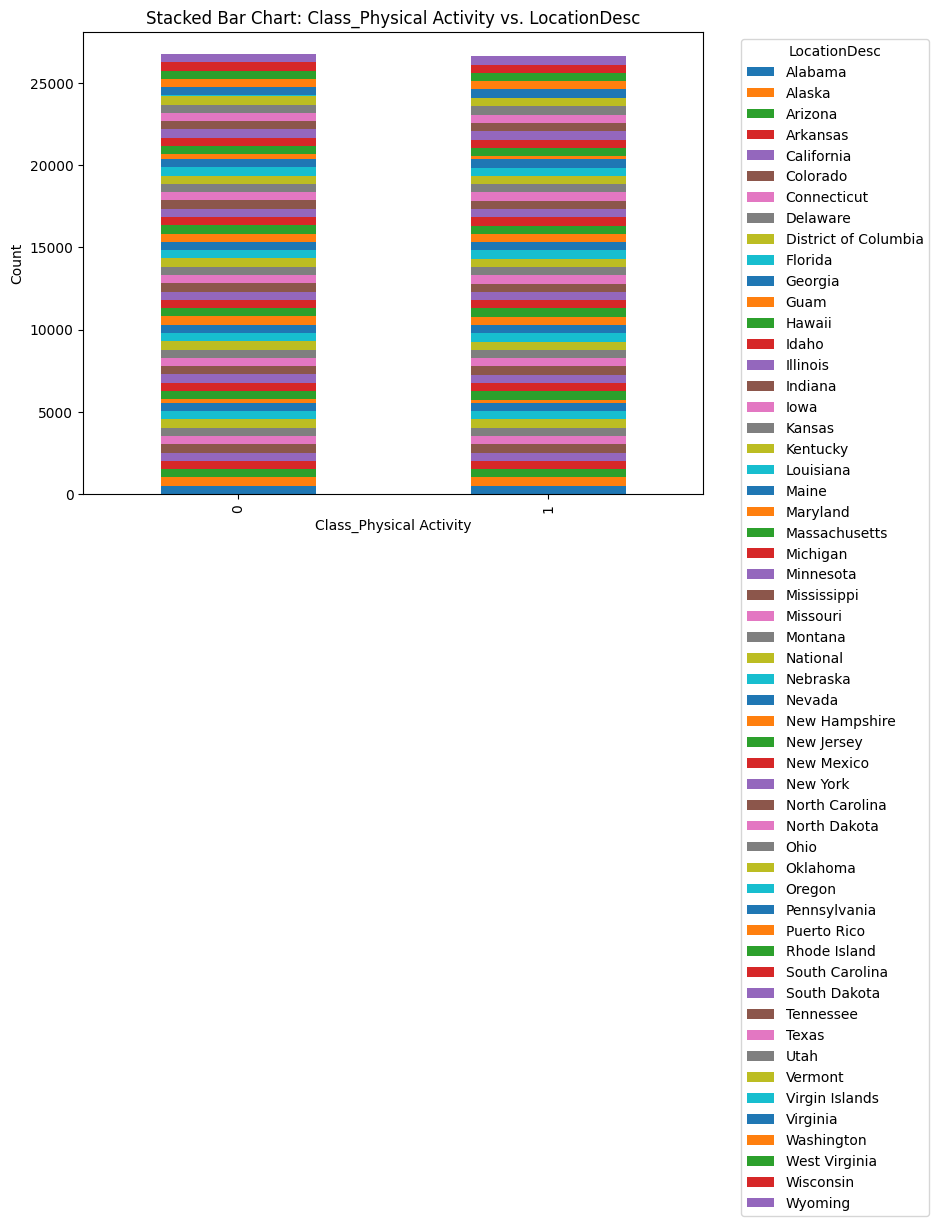

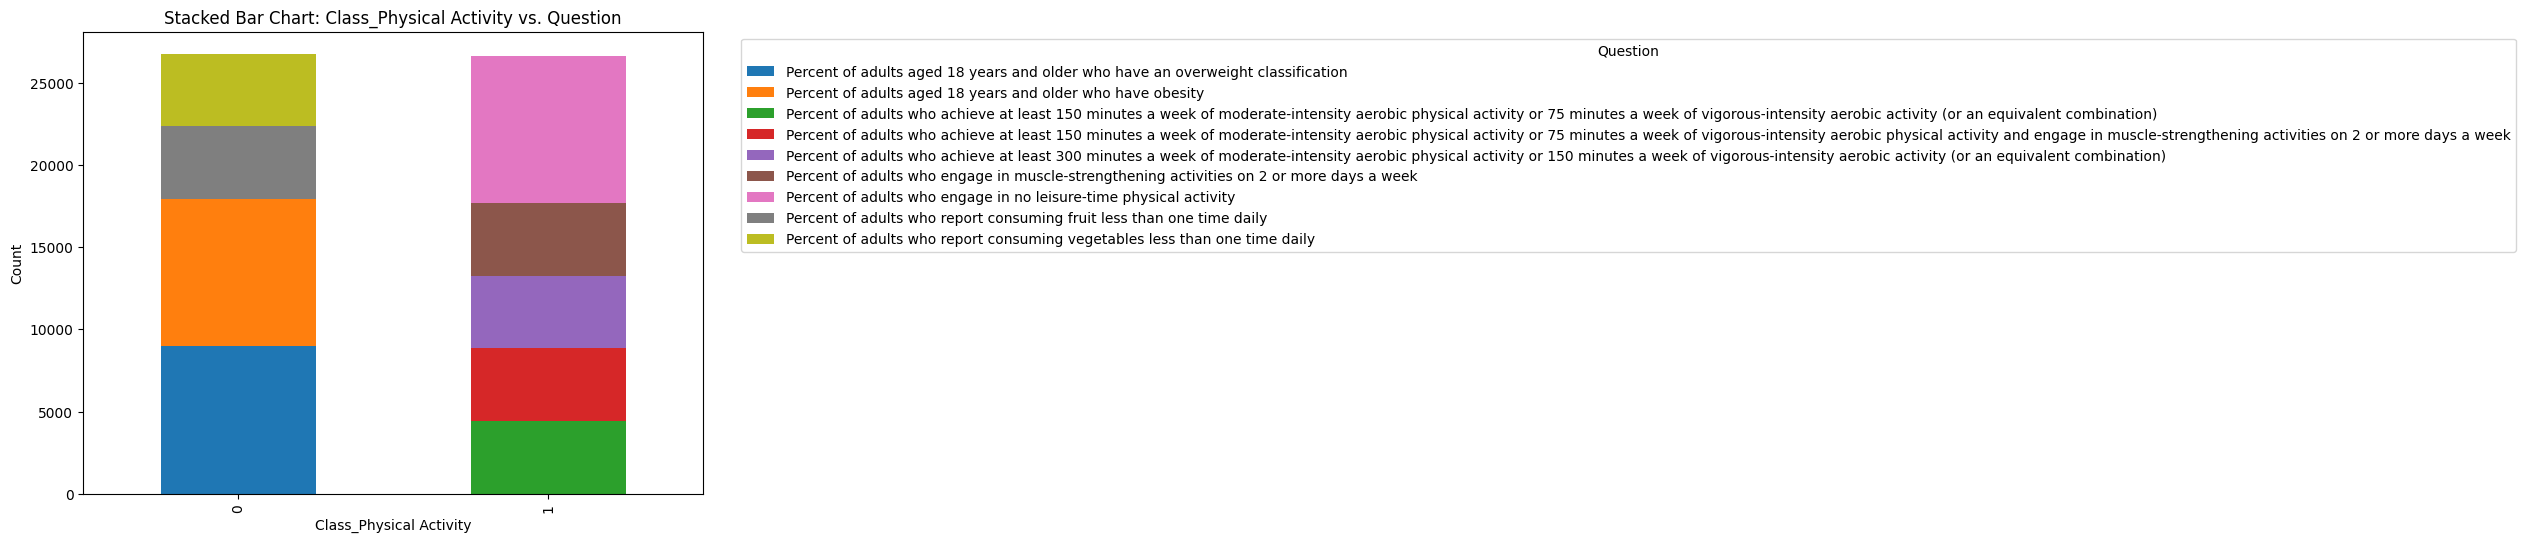

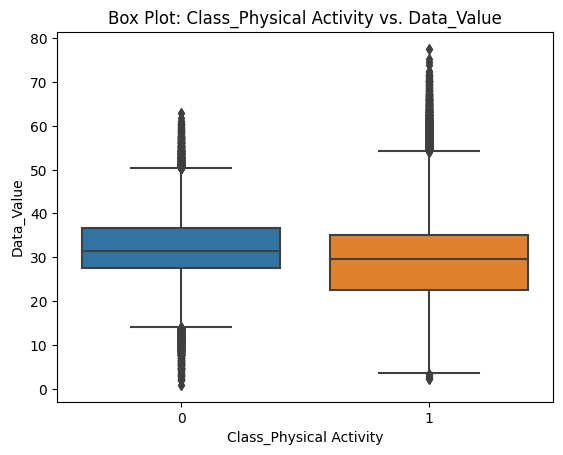

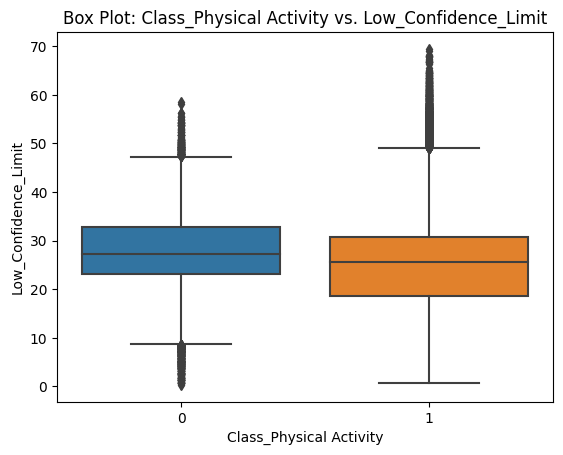

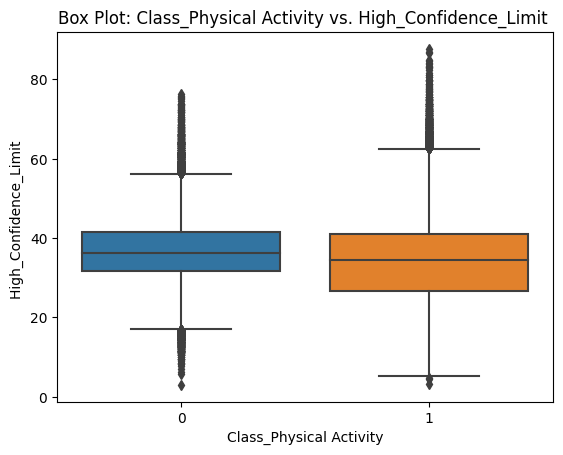

In [16]:
"""
Generate visualizations to explore the relationships between 'physical_activity_col' and other columns in the DataFrame.

Parameters:
    df (DataFrame): The input DataFrame containing the data.
    physical_activity_col (str): The column name for the 'Class_Physical Activity' variable.

Returns:
    None

This function generates visualizations to explore the relationships between the specified 'physical_activity_col'
and other columns in the DataFrame. It creates different types of plots based on the data types of the columns,
including stacked bar charts for categorical vs. categorical, box plots for categorical vs. numeric, and stacked bar
charts for categorical vs. categorical (for categorical columns).
"""

def plot_relationships_with_physical_activity(df, physical_activity_col='Class_Physical Activity'):
    # Get all columns except 'physical_activity_col'
    other_columns = [col for col in df.columns if col != physical_activity_col]

    # Loop through each column and create plots based on data type
    for col in other_columns:
        if df[col].dtype == 'object':
            # Categorical vs. Categorical: Stacked bar chart
            contingency_table = pd.crosstab(df[physical_activity_col], df[col])
            contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
            plt.title(f'Stacked Bar Chart: {physical_activity_col} vs. {col}')
            plt.xlabel(physical_activity_col)
            plt.ylabel('Count')
            plt.legend(title=col, loc='upper left', bbox_to_anchor=(1.05, 1))
            plt.show()
        elif df[col].dtype in ['int64', 'float64']:
            # Categorical vs. Numeric: Box plot
            sns.boxplot(x=physical_activity_col, y=col, data=df)
            plt.title(f'Box Plot: {physical_activity_col} vs. {col}')
            plt.xlabel(physical_activity_col)
            plt.ylabel(col)
            plt.show()
        elif df[col].dtype == 'category':
            # Categorical vs. Categorical: Stacked bar chart (for categorical columns)
            contingency_table = pd.crosstab(df[physical_activity_col], df[col])
            contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
            plt.title(f'Stacked Bar Chart: {physical_activity_col} vs. {col}')
            plt.xlabel(physical_activity_col)
            plt.ylabel('Count')
            plt.legend(title=col, loc='upper left', bbox_to_anchor=(1.05, 1))
            plt.show()

plot_relationships_with_physical_activity(df_physical_class)

<ipython-input-17-690b20711a1b>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_physical_class.corr()


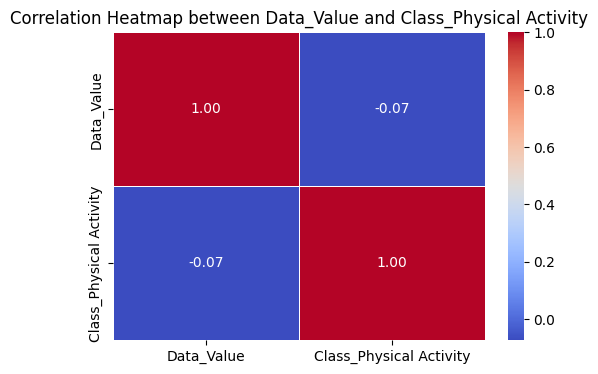

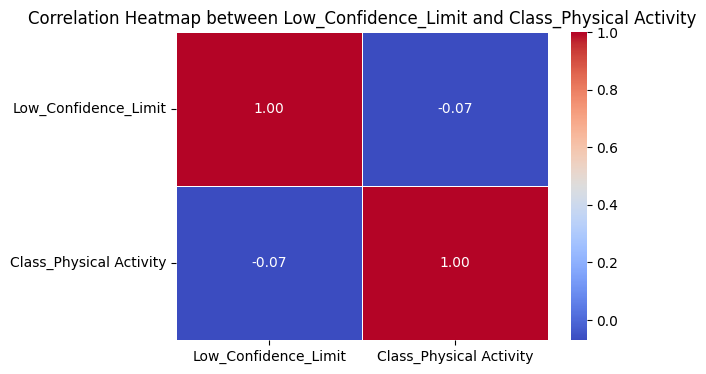

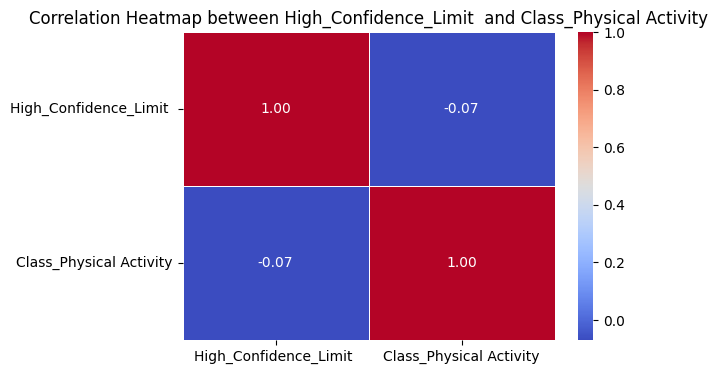

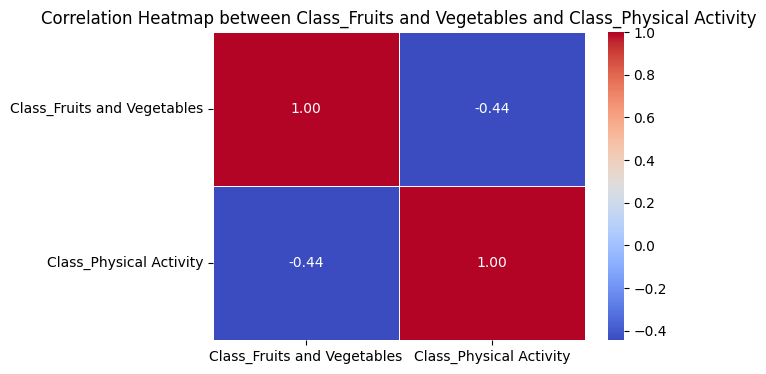

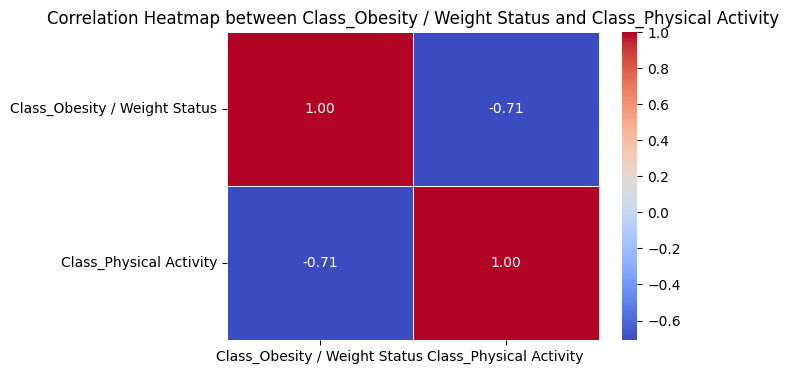

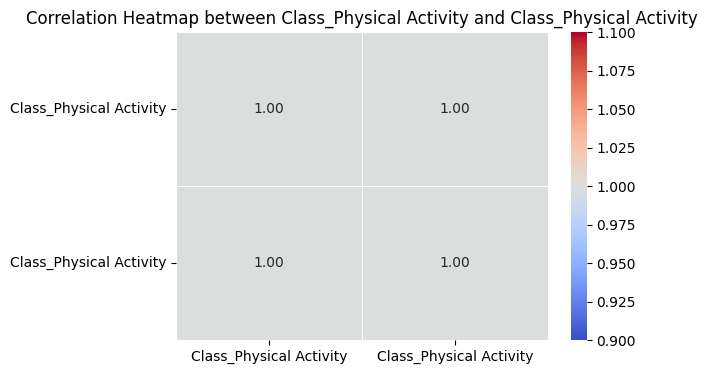

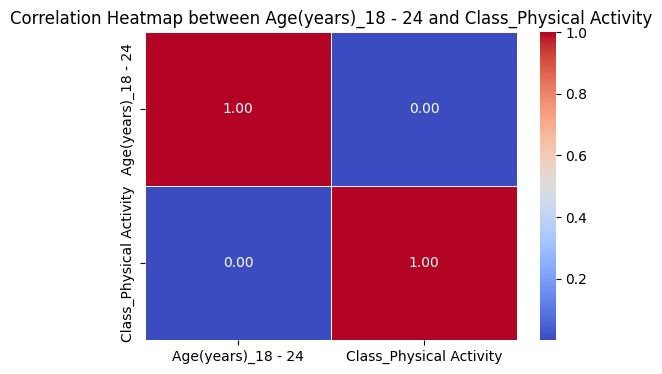

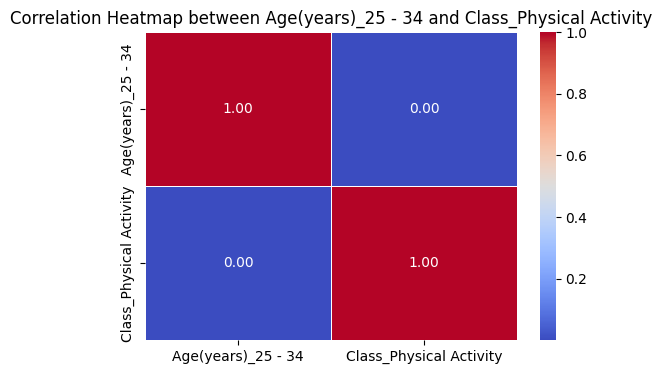

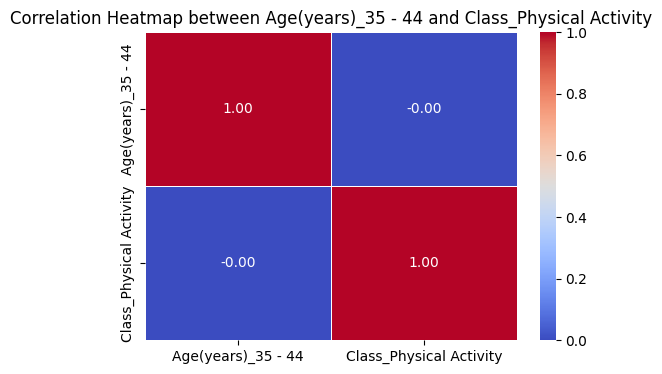

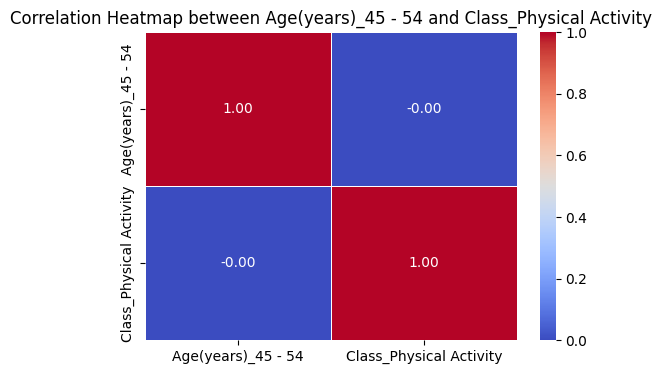

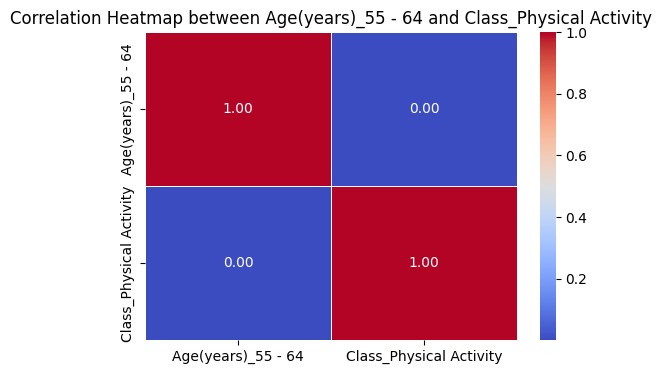

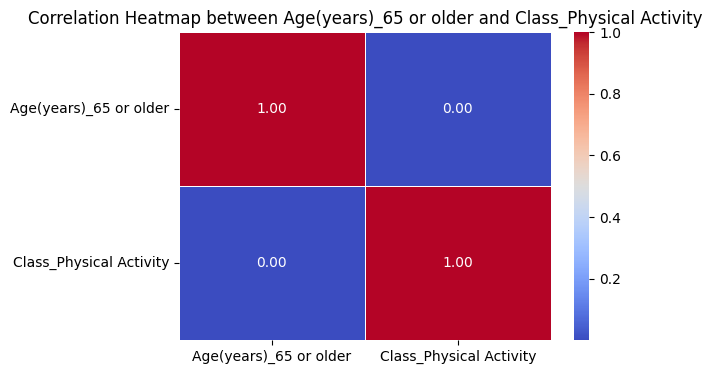

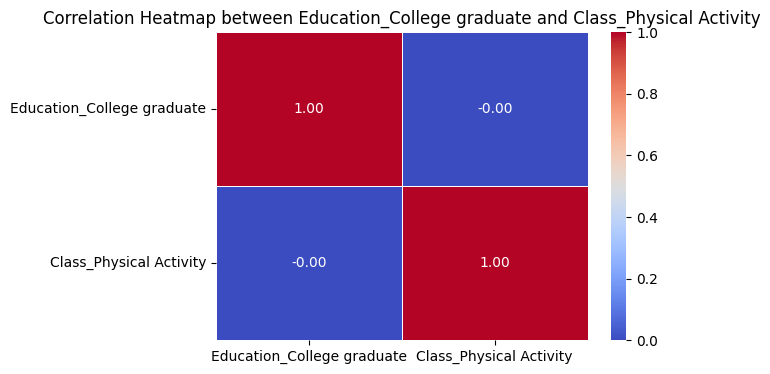

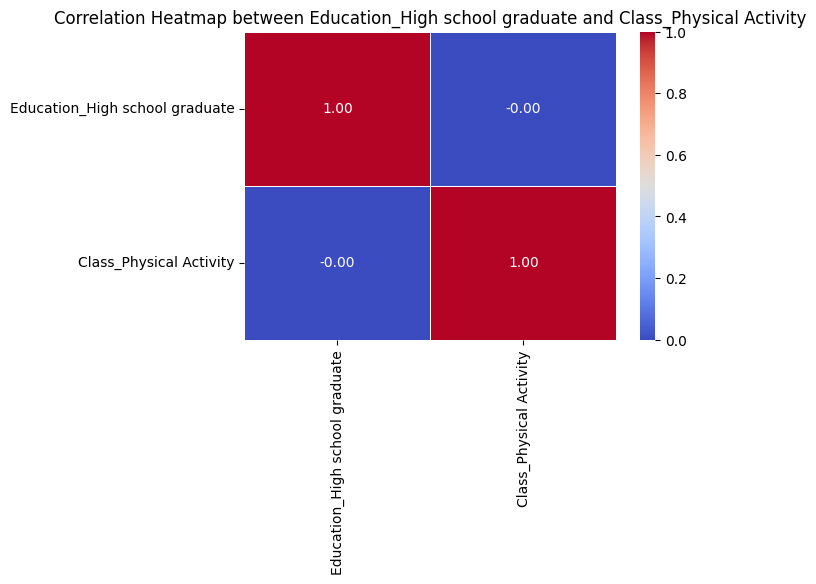

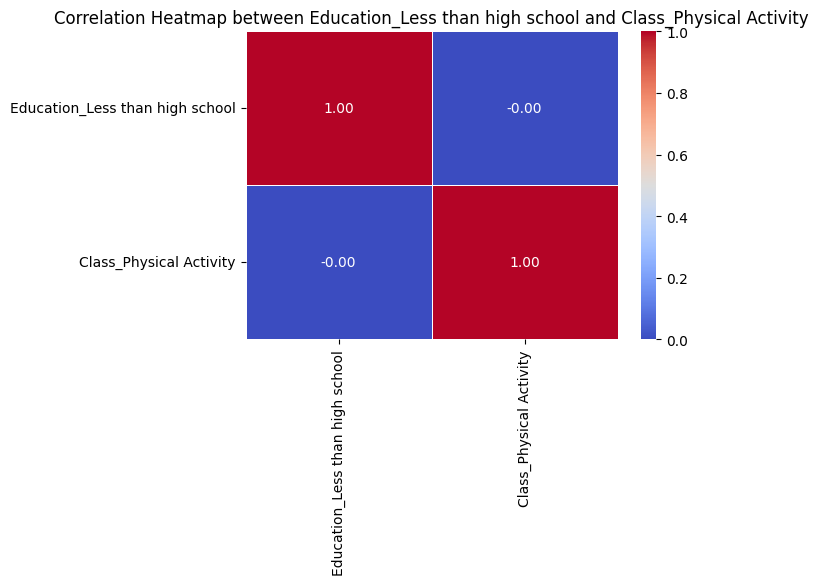

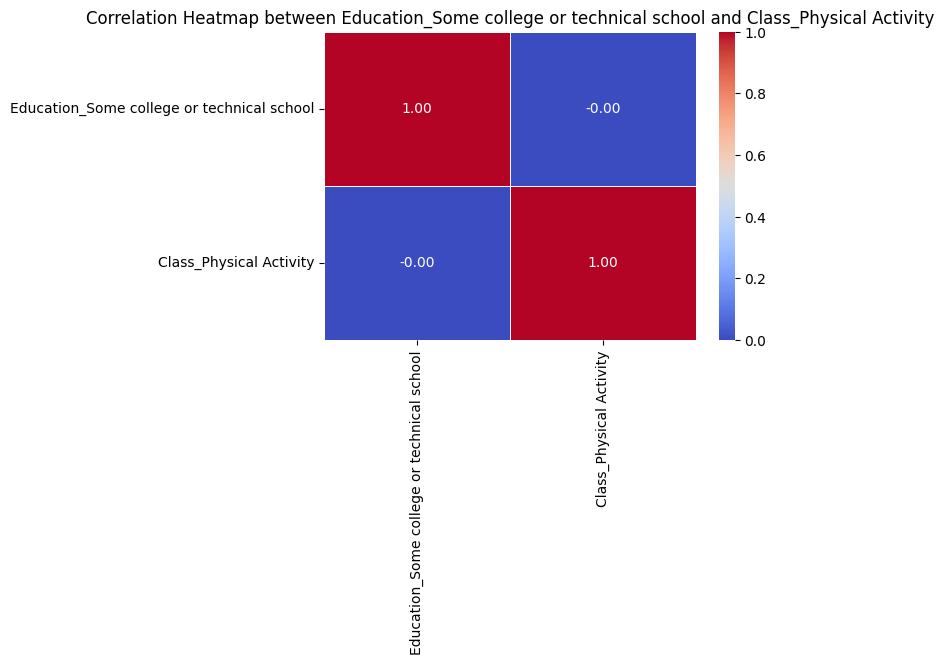

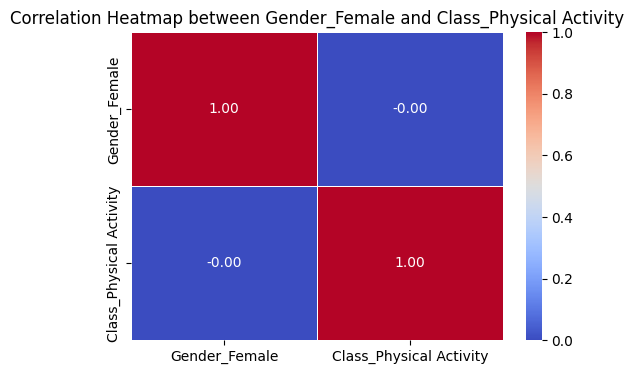

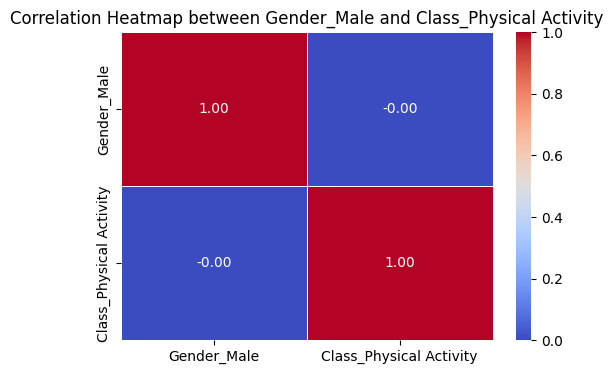

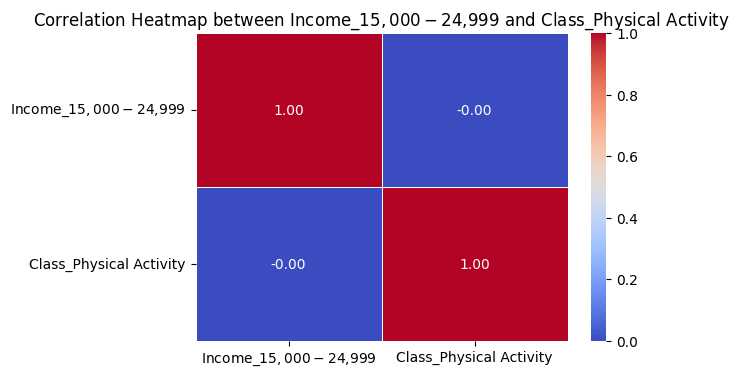

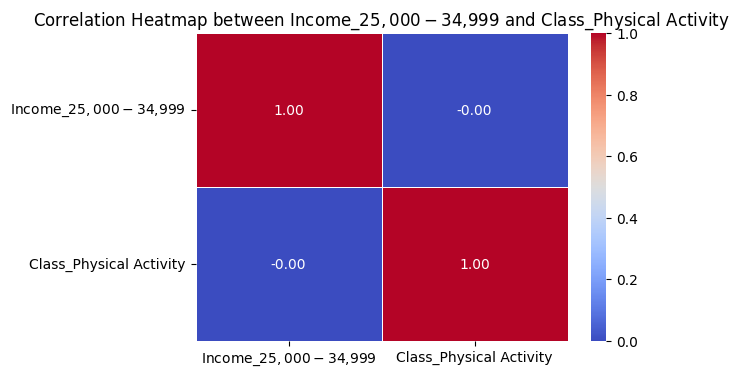

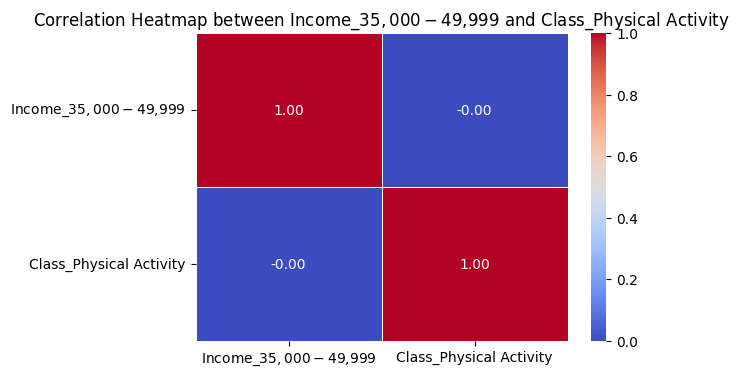

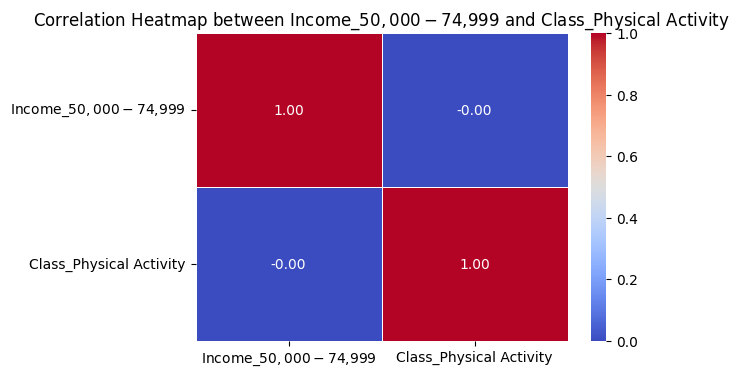

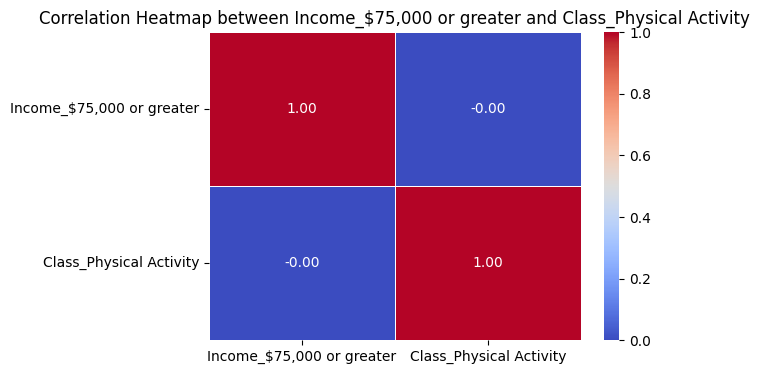

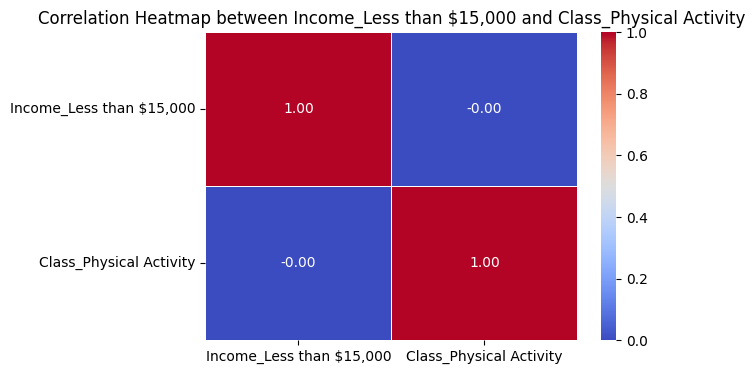

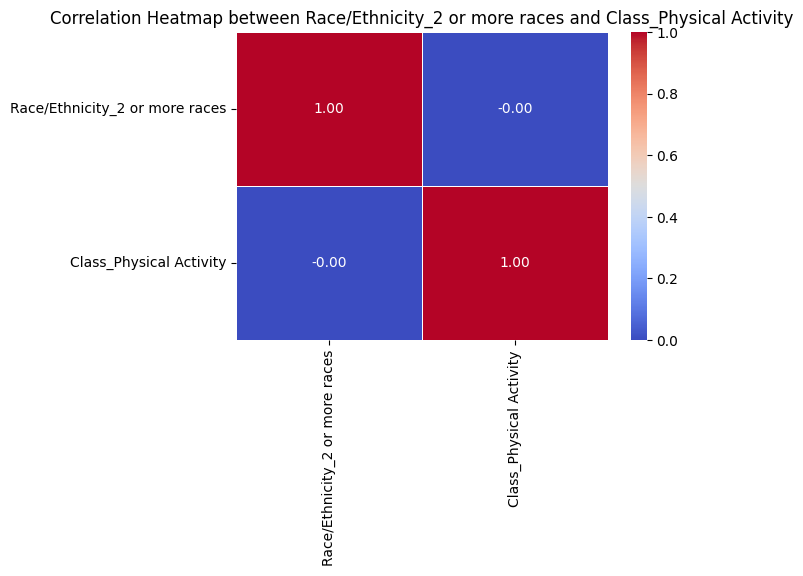

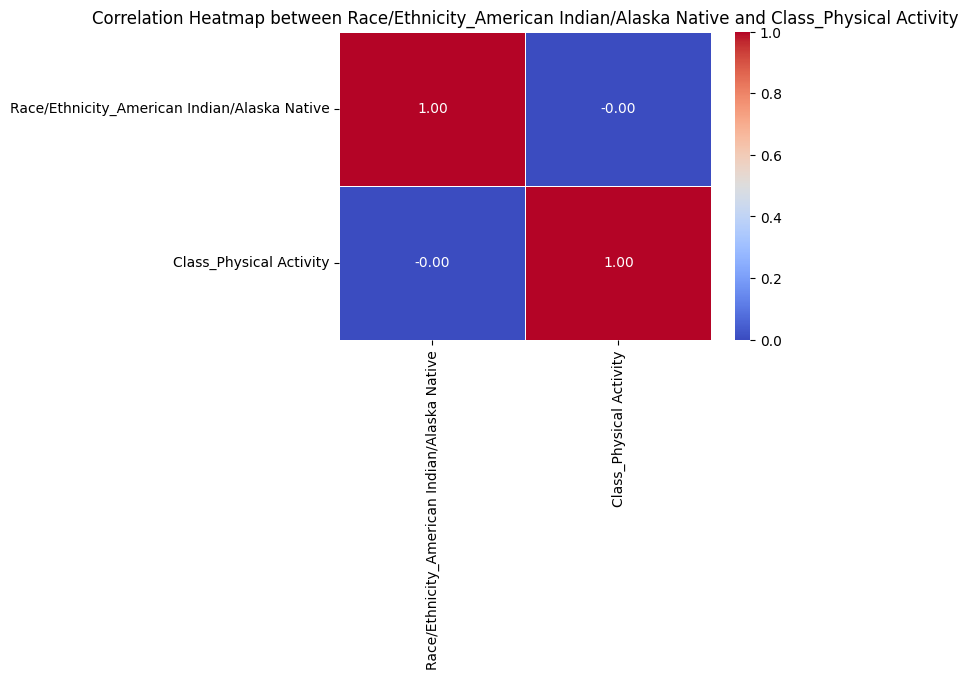

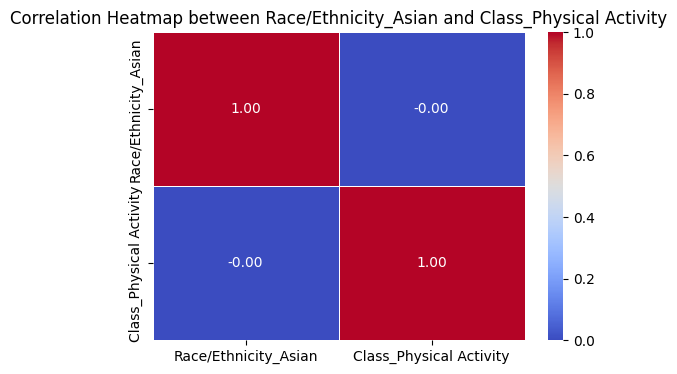

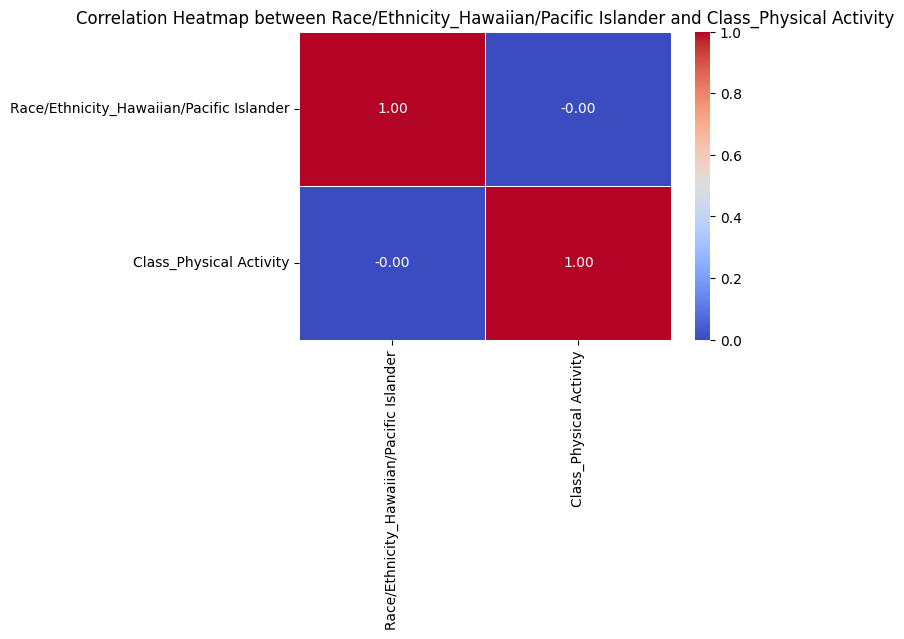

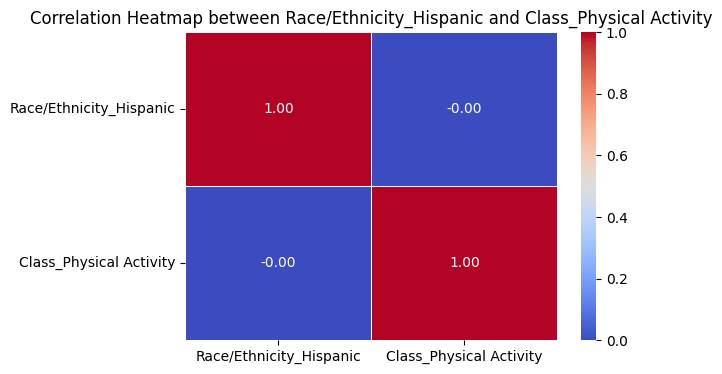

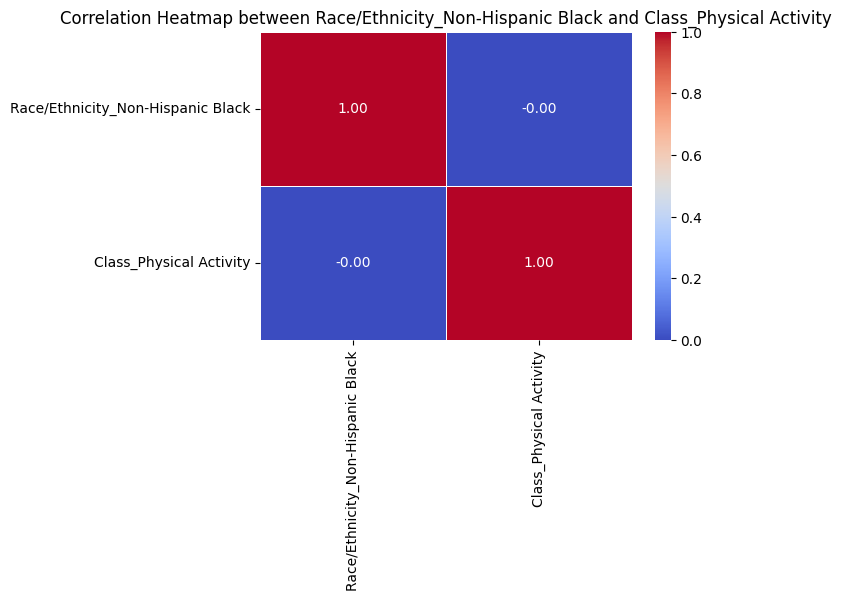

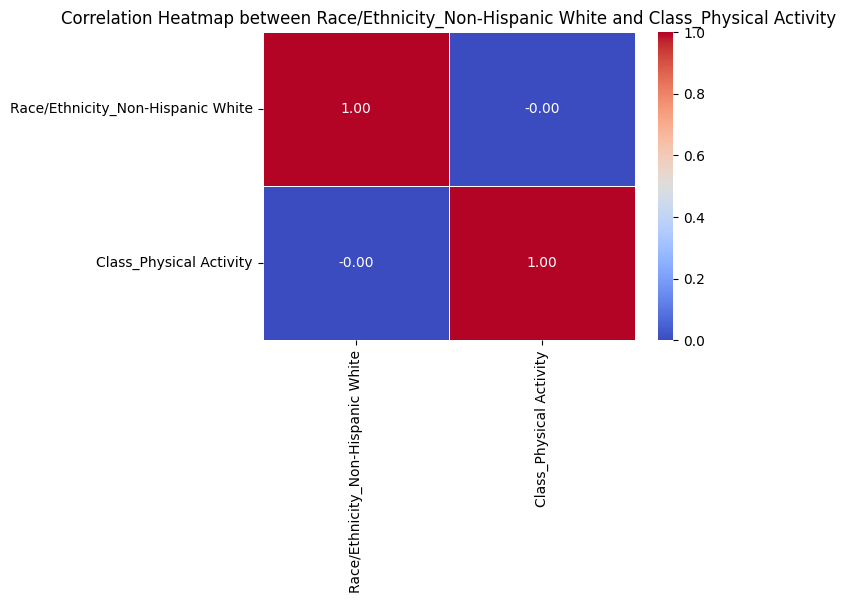

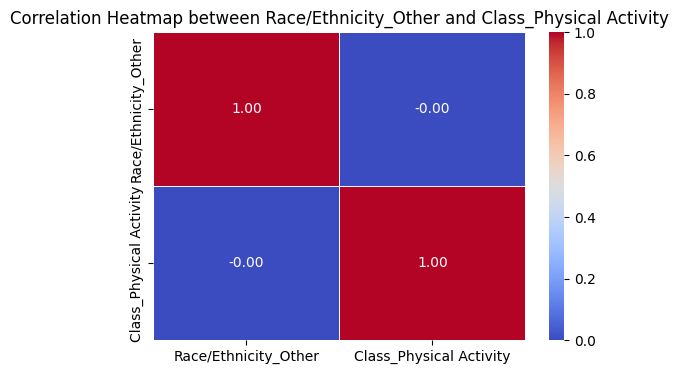

In [17]:
"""
Generate individual heatmaps to visualize the correlation between 'Class_Physical Activity'
and other associated columns in the 'df_physical_class' DataFrame.

Parameters:
    df_physical_class (DataFrame): The input DataFrame containing one-hot encoded data with 'Class_Physical Activity'.

Returns:
    None

This function calculates the correlation matrix between 'Class_Physical Activity' and all associated columns,
and then generates individual heatmaps to visualize the correlations for each associated column.

"""

# Calculate the correlation matrix
correlation_matrix = df_physical_class.corr()

# Extract the correlation of 'Class_Physical Activity' with other columns
correlation_with_physical_activity = correlation_matrix['Class_Physical Activity']

# Get a list of columns associated with 'Class_Physical Activity'
associated_columns = correlation_with_physical_activity.index[1:]

# Create individual heatmaps for each associated column
for column in associated_columns:
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_physical_class[[column, 'Class_Physical Activity']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap between {column} and Class_Physical Activity')
    plt.show()

In [18]:
"""
This code performs linear and polynomial regression on a dataset with the target variable 'Data_Value' and other features.
It evaluates the performance of both regression models using metrics like MAE, MSE, RMSE, and R-squared.

Parameters:
    None

Returns:
    results (DataFrame): A table containing metrics for linear and polynomial regression models.
"""

# Exclude the target variable from X
X = pd.get_dummies(df_physical_class.drop(['Data_Value'], axis=1), drop_first=True)

# Handle missing values (replace NaN with mean)
X.fillna(X.mean(), inplace=True)

# Define the target variable
y = df_cleaned['Data_Value']  # Dependent variable

# Align the indices of X and y
X, y = X.align(y, axis=0, join='inner')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a polynomial regression model
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions using both models
y_pred_linear = linear_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the linear regression model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate the polynomial regression model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Linear Regression': [mae_linear, mse_linear, rmse_linear, r2_linear],
    'Polynomial Regression': [mae_poly, mse_poly, rmse_poly, r2_poly]
})
results

,Metric,Linear Regression,Polynomial Regression
0,MAE,0.149272,0.057291
1,MSE,0.089130,0.009666
2,RMSE,0.298547,0.098315
3,R-squared,0.998778,0.999867
